In [15]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as Functional
import torch.optim as optim

In [6]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root = './data', train = True,
                                       download = True, transform = transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root = './data', train = False,
                                       download = True, transform = transform)

testloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified


 bird   car   car  ship


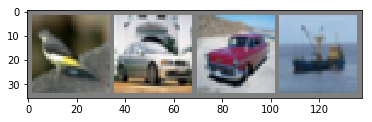

In [13]:
def imShow(img):
    # Denormalize
    img = img / 2 + 0.5
    npImg = img.numpy()
    plt.imshow(np.transpose(npImg, (1, 2, 0)))
    
# Get some random training images
dataIter = iter(trainloader)
images, labels = dataIter.next()

# Show Images
imShow(torchvision.utils.make_grid(images))

# Print Labels
print ' '.join('%5s' % classes[labels[j]] for j in range(4))

In [14]:
# Define CNN
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        x = self.pool(Functional.relu(self.conv1(x)))
        x = self.pool(Functional.relu(self.conv2(x)))
        x = x.view(-1, 16*5*5)
        x = Functional.relu(self.fc1(x))
        x = Functional.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()
print(net)

Net(
  (conv1): Conv2d (3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), dilation=(1, 1))
  (conv2): Conv2d (6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120)
  (fc2): Linear(in_features=120, out_features=84)
  (fc3): Linear(in_features=84, out_features=10)
)


In [18]:
# Define Loss Function and Optimizer
# Will be using Stochastic Gradient Descent 
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr = 0.001, momentum = 0.9)

In [21]:
# Train the network
for epoch in range(2):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # Get the inputs
        inputs, labels = data
        
        # Wrap in Variables
        inputs, labels = Variable(inputs), Variable(labels)
        
        # Zero the parameter gradients
        optimizer.zero_grad()
        
        # Forward + Backward + Optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        # Stats
        running_loss += loss.data[0]
        if i % 2000 == 1999: 
            # Print every 2000th mini-batches
            print '[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 2000)
            running_loss = 0.0
            
print 'Training Done!'

[1,  2000] loss: 2.200
[1,  4000] loss: 1.868
[1,  6000] loss: 1.681
[1,  8000] loss: 1.595
[1, 10000] loss: 1.517
[1, 12000] loss: 1.472
[2,  2000] loss: 1.390
[2,  4000] loss: 1.377
[2,  6000] loss: 1.345
[2,  8000] loss: 1.320
[2, 10000] loss: 1.301
[2, 12000] loss: 1.283
Training Done!


Ground truth:   frog  truck  truck   deer 


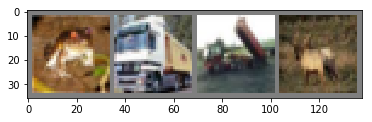

In [23]:
# Test the network
dataiter = iter(testloader)
images, labels = dataiter.next()

# Print images
imShow(torchvision.utils.make_grid(images))
print 'Ground truth: ', ' '.join('%5s'%classes[labels[j]] for j in range(4))

In [28]:
outputs = net(Variable(images))
_, predicted = torch.max(outputs.data, 1)
print 'Predicted: ', ' '.join('%5s'% classes[labels[j]] for j in range(4))

Predicted:   frog truck truck  deer


In [29]:
# Accuracy over whole dataset
correct = 0
total = 0
for data in testloader:
    images, labels = data
    outputs = net(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()
    
print 'Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total)

Accuracy of the network on the 10000 test images: 57 %
